## Случайные события. Условная вероятность. Формула Байеса.  Независимые испытания

# Урок 1

### Случайные события

__Случайное событие__ — любой исход опыта, который может произойти или не произойти.

Например,
1. При броске двух игральных костей на одной выпало число $1$, а на другой — $2$.
2. Клиент банка не вернул кредит.
3. Температура воздуха в Москве за последние десять дней не превышала $29$ градусов по Цельсию.

Пусть $A$ и $B$ — случайные события.
* Сумма событий $A + B$ соответствует наступлению хотя бы одного из событий $A$ и $B$. Такое событие иногда называют объединением.
* Произведение $A \cdot B$ соответствует наступлению событий $A$ и $B$ одновременно. Такое событие ещё называется совместным.
* Отрицание $\overline{A}$ соответствует тому, что событие $A$ не наступило. Такое событие также называется дополнительным.

Событие называется __достоверным__, если в результате испытания оно обязательно произойдет. Наоборот, __невозможным событием__ мы называем событие, которое никогда не произойдет.

Примеры достоверного события:
1. На игральной кости выпало число, не превышающее 6.
2. Подбросили монету, и выпал либо орел, либо решка.
3. Монету подбросили стократно, и решка выпала не более 100 раз.

Примеры невозможного события:
1. Две игральные кости бросили один раз, и сумма выпавших чисел составила 15.
2. Монету подбросили стократно, и решка выпала 55 раз, а орел — 56.

__Совместными__ называются события, которые могут произойти вместе. Соответственно, __несовместными__ называются события, которые вместе случиться не могут.

Например,
* При броске монеты не могут одновременно выпасть орел и решка. Это несовместные события.
* При броске дротика в круглую мишень можно попасть одновременно в правую половину мишени и в нижнюю половину. Это совместные события.


# Статистическая вероятность

Для случайного события есть понятие **относительной частоты**. Это отношение количества испытаний, в которых данное событие состоялось, к общему числу испытаний:

$$W(A) = \frac{m}{n},$$
где
* $W(A)$ - это относительная частота события $A$,
* $m$ - число испытаний, в результате которых произошло событие $A$,
* $n$ - общее число испытаний.

Рассмотрим примеры случайных событий.

**Пример 1**

Смоделируем $60$-кратное подбрасывание игральной кости с помощью функции [random.randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html) пакета **numpy**.
В этом случае $n = 60$.

In [1]:
import numpy as np

In [4]:
n = 60

b = np.random.randint(1, 7, size=n)

print(b)

[1 4 1 6 3 1 5 4 6 4 3 3 6 4 4 2 2 6 6 4 4 6 1 2 2 4 1 5 4 4 1 4 5 4 1 4 3
 1 6 3 1 4 4 2 3 3 5 3 6 6 2 5 1 3 5 3 2 6 4 3]



Событием $A$ будем считать выпадание числа $3$. Сперва найдем его относительную частоту.Вычислим мощность подмножества, где наблюдалось событие $A$, т.е. выпадало число $3$

In [5]:
b == 3

array([False, False, False, False,  True, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False,  True,
        True, False,  True, False, False, False, False, False,  True,
       False,  True, False, False, False,  True])

Вычислим мощность подмножества, где в результате испытания выпадало число $3$, то есть наблюдалось событие $A$:

In [6]:
m = sum(b == 3)

m

11

Теперь можем вычислить относительную частоту события $A$:

In [7]:
W = m / n

print(W)

0.18333333333333332


*Замечание: здравый смысл подсказывает, что вероятность такого события равна $1/6$:*

In [8]:
1 / 6

0.16666666666666666

**Пример 2**

Разберем более сложный пример. Смоделируем ситуацию, когда бросают две игральные кости одновременно.

При этом будем находить частоту случайного события $B$, при котором на первой кости выпало $1$, а на второй - $2$. 

Проведем для этого $360$ испытаний.

In [9]:
n = 360

In [10]:
c = np.random.randint(1, 7, size=n)
d = np.random.randint(1, 7, size=n)

Числа, стоящие на одной позиции в массивах $c$ и $d$, будем считать результатами, полученными в одном испытании.

В первом испытании на первой игральной кости выпало число $c[0]$, а на второй - $d[0]$.

In [11]:
i = 0
print(c[i], d[i])

4 5


Посчитаем число случаев, когда в одном испытании на первой игральной кости выпало число $1$, а на второй - $2$.

In [12]:
m = sum((c == 1) & (d == 2))

print(m)

9


In [13]:
m = ((c == 1) & (d == 2)).sum()

print(m)

9


Вычислим относительную частоту события $B$:

In [14]:
W = m / n

print(W)

0.025


Аналогично, вероятность такого события:

In [15]:
1 / 36

0.027777777777777776

Как правило, чем больше испытаниф мы делаем, тем больше значение частоты "стабилизируется", т.е. приближиается к какому-то конкретному значению.

**Пример 3**

При достаточно большом количестве испытаний $n$ величина относительной частоты $W$ будет стремиться к конкретному числу. Оно называется __статистической вероятностью__ и обозначается как $P(A)$:

$$P(A) = \frac{m}{n}$$

Статистическую вероятность можно вычислить на основе данных, полученных по результатам многочисленных испытаний.

Вернемся к примеру 1 (бросок одного кубика) и посчитаем его относительную частоту при различных значениях $n$.

In [2]:
def dice_probability(n: int) -> float:
    """Относительная частота выпадения значения 3 при броске одного кубика.
    :param n: число испытаний
    """
    b = np.random.randint(1, 7, size=n)
    
    m = sum(b == 3)
    
    return m / n

In [3]:
from matplotlib import pyplot as plt
from tqdm import trange

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:59<00:00,  2.39s/it]


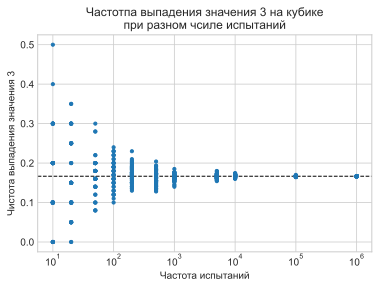

In [4]:
ns = [10, 20, 50, 100, 200, 500, 1000, 5000, 10 ** 4, 10 ** 5, 10 **6]

x = []
y = []

for _ in trange(50):
    for n in ns:
        x.append(n)
        y.append(dice_probability(n))
        
plt.scatter(x, y, s=10)
plt.axhline(y=1/6, c='black', ls='dashed', lw=1).set_zorder(0)

plt.xscale('log')
plt.title('Частотпа выпадения значения 3 на кубике\nпри разном чсиле испытаний')
plt.xlabel('Частота испытаний')
plt.ylabel('Чистота выпадения значения 3')

plt.show()

In [23]:
dice_probability(10), dice_probability(50), dice_probability(200), dice_probability(10 ** 6)

(0.3, 0.12, 0.15, 0.16632)

In [24]:
1 / 6

0.16666666666666666

Свойства вероятности:

* $0 \leq P(A) \leq 1$ для любого события $A$.
* $P(\varnothing) = 0$, $P(\Omega) = 1$, где $\varnothing$ — невозможное событие, $\Omega$ — достоверное событие.
* $P(A + B) = P(A) + P(B) - P(AB)$, где $A + B$ — объединение событий (происходит хотя бы одно), а $AB$ — совместное событие (происходят оба).
* В частности, для несовместных событий $P(A + B) = P(A) + P(B)$.
* $P(A) + P(\overline{A}) = 1$ для любого события $A$.

Для более сложных случаев число исходов $k$, благоприятствующих данному событию, или число всех элементарных исходов испытания ($n$) можно вычислить с помощью формул комбинаторики.

# Комбинаторика

__Размещение из $n$ элементов по $k$ элементов__ — это упорядоченный набор из $k$ элементов, выбранных из множества, содержащего $n$ элементов.

Число размещений из $n$ по $k$:

$$A_n^k = \frac{n!}{(n - k)!}$$
где n! = n · (n − 1) · (n − 2)· · · 2 · 1 — факториал.

In [25]:
def arrangements(n: int, k: int) -> int:
    """Число размещений"""
    
    return np.math.factorial(n) // np.math.factorial(n - k)

__Перестановкой из $n$ элементов__ называется размещение из $n$ элементов по $n$ элементов.

Число перестановок из $n$ элементов:

$$P_n = n!$$

In [26]:
def permutations(n: int) -> int:
    """Число перестановок"""
    
    return np.math.factorial(n)

__Сочетание из $n$ элементов по $k$ элементов__ — это неупорядоченный набор из $k$ элементов, выбранных из множества, содержащего $n$ элементов.

Например, набор {1, 3, 5} является сочетанием из множества {1, 2, 3, 4, 5}. При
этом, {1, 3, 5} и {5, 1, 3} — одно и то же сочетание

Число сочетаний из $n$ по $k$:

\$$C_n^k = \frac{n!}{k!(n - k)!}$$

In [6]:
def combinations(n: int, k: int)-> int:
    """Число сочетаний"""
    
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

Рассмотрим на примерах, как применяются формулы комбинаторики.

**Пример 4**

Сколькими способами можно выбрать из колоды, состоящей из 36 карт, 4 карты?

Для ответа на этот вопрос воспользуемся формулой для вычисления количества сочетаний:

$$C_{36}^4 = \frac{36!}{4!(36 - 4)!} = \frac{36!}{4! \cdot 32!} = \frac{33 \cdot 34 \cdot 35 \cdot 36}{4!} = \frac{33 \cdot 34 \cdot 35 \cdot 36}{2 \cdot 3 \cdot 4} = 58905$$

In [5]:
combinations(36, 4)

58905

**Пример 5**

В магазине 20 покупателей. Сколькими способами они могут образовать очередь из 5 человек?

В этом примере важен порядок, в котором покупатели будут стоять в очереди, поэтому применим формулу для нахождения числа размещений:

In [6]:
arrangements(20, 5)

1860480

**Пример 6**

Сколькими способами 5 покупателей могут образовать очередь?

Этот пример похож на предыдущий, но есть важное отличие: не нужно выбирать 5 покупателей из 20. Здесь их всего 5, и все должны присутствовать в очереди. Применим формулу для нахождения числа перестановок:

In [ ]:
permutations(5)

120

**Пример 7**

Из колоды, состоящей из 36 карт, случайным образом выбраны 5. Сколькими способами можно выбрать эти карты так, чтобы среди них оказалось от 2 до 3 тузов?

Чтобы решить эту задачу, нужно сначала рассмотреть ситуацию, когда выбирается два туза из четырех.

Число таких сочетаний будет равно:

In [ ]:
combinations(4, 2)

6

Остальные три карты выбираются из 32 карт  — тузы не рассматриваются, так как они уже выбраны:

In [ ]:
combinations(32, 3)

4960

И в этом случае будет такое число сочетаний, когда из колоды, в которой 36 карт, выбраны пять, две из которых — тузы:

In [ ]:
a = combinations(4, 2) * combinations(32, 3)

print(a)

29760


Теперь рассмотрим ситуацию выбора трех тузов из четырех. Число сочетаний будет равно:

In [ ]:
combinations(4, 3)

4

Остальные две карты выбираются из 32 карт. Число сочетаний будет равно:

In [ ]:
combinations(32, 2)

496

И тогда будет такое число сочетаний, когда из колоды в 36 карт выбраны пять, три из которых — тузы:

In [ ]:
b = combinations(4, 3) * combinations(32, 2)

print(b)

1984


Осталось сложить полученные числа сочетаний:

In [ ]:
a + b

31744

# **Классическое определение вероятности**

Сформулируем __классическое определение вероятности__. Предположим, проводится опыт с $n$ возможными исходами, причем все эти исходы равновозможны и несовместны. Такие исходы называются __элементарными событиями__.

Например, 
* Игральный кубик бросается однажды. Его выпадение каждой из $6$ сторон — все элементарные события.
* Кубик бросается дважды. Элементарные события — все пары его значений.

Вероятность события — это отношение числа элементарных исходов, которые приводят к данному событию, к числу всех возможных исходов опыта.

Формула для этого определения такая же, как и для статистической вероятности:

$$P(A) = \frac{m}{n}$$

**Пример 7**

Вычислим вероятность того, что на игральной кости выпадет число 3. Известно, что у кости шесть граней с числами от $1$ до $6$ и каждая может выпасть с равной вероятностью. По формуле классической вероятности получаем результат:

$$P(A) = \frac{m}{n} = \frac{1}{6}$$

**Пример 8**

Бросаются одновременно три игральных кубика. Какова вероятность того, что все три значения будут одинаковыми?

Всего есть $6 \cdot 6 \cdot 6$ исходов, поскольку каждый из кубиков может выпасть любой из $6$ сторон. Нас интересуют исходы, при которых все три значения совпали. Таких событий $6$. Итак,

$$P(A) = \dfrac{6}{6^3} = \dfrac{1}{36}$$

### Условная вероятность

__Условная вероятность__ $P(B|A)$ — это вероятность наступления события $B$ при условии, что произошло событие $A$.

$$P(B | A) = \dfrac{P(AB)}{P(A)}$$

События $A$ и $B$ называются независимыми, если $P(B|A) = P(B)$.

Например, если монета подбрасывается дважды, то выпадение орла в первый раз и выпадение орла во второй — независимые события.

Вероятность одновременного появления двух независимых событий вычисляется по формуле:

$$P(AB) = P(A) \cdot P(B)$$

**Пример 9**

Найдем вероятность того, что при броске двух игральных костей на первой выпадет четное число, а на второй — кратное трем. Сначала рассмотрим вероятность выпадения четного числа на первой кости. Таких случаев может быть три: это события, при которых выпадают числа $2$, $4$ и $6$. Вероятность для каждого из них равна $1/6$.

Так как эти три события являются несовместными, вероятность их суммы равна сумме их вероятностей:

$$P(четн.) = \frac{1}{6} + \frac{1}{6} + \frac{1}{6} = \frac{3}{6} = \frac{1}{2}$$

Для второй кости подходящих событий два: это выпадение чисел 3 и 6. Это тоже несовместные события, и мы можем сложить их вероятности:

$$P(кратн. 3) = \frac{1}{6} + \frac{1}{6} = \frac{2}{6} = \frac{1}{3}$$

С учетом того, что выпадение числа на одной кости не влияет на результат на другой — то есть эти события независимы, — применим умножение вероятностей и получим итоговый ответ:

$$P = \frac{1}{2} \cdot \frac{1}{3} = \frac{1}{6}$$

### Формула полной вероятности. Формула Байеса

**Формула полной вероятности**

Говорят, что события $H_1$, $H_2$, $\dots$, $H_n$ образуют __полную группу событий__, если в ходе любого испытания одно из этих событий произойдет. Другими словами, $P(H_1 + H_2 + \dots + H_n) = 1$. 

Формула полной вероятности для таких событий и произвольного события $A$:

$$P(A) = P(H_1) \cdot P(A | H_1) + P(H_2) \cdot P(A | H_2) + \dots + P(H_n) \cdot P(A | H_n)$$

Выражение $P(B\;|\;A)$ означает вероятность наступления события $B$ при условии, что событие $A$ произошло.

**Пример 10**

Есть три одинаковые корзины. В первой лежат три красных и пять зеленых мячей, во второй — только красные, а в третьей — только зеленые мячи. Случайно выбирается одна корзина и из нее случайным образом извлекается мяч. 

Какова вероятность того, что этот мяч — зеленый?

Решим эту задачу с помощью формулы полной вероятности. Событием $A$ будем считать то, что достанут зеленый мяч, а событием $B$ — что выберут определенную корзину. Причем вероятность выбора одной из трех корзин будет равна $1/3$.

Вероятность достать зеленый мяч при условии, что выбрана первая корзина, равен $\dfrac{5}{3 + 5} = \dfrac{5}{8}$. При выборе второй корзины вероятность вынуть зеленый мяч равна $0$. В случае с третьей корзиной вероятность равна $1$, так как все мячи в ней — зеленые.

Подставим данные значения в формулу полной вероятности и получим итоговый ответ:

$$P(A) = \frac{1}{3} \cdot \frac{5}{8} + \frac{1}{3} \cdot 0 + \frac{1}{3} \cdot 1 = \frac{5}{24} + 0 + \frac{1}{3} = \frac{13}{24} \approx 0.5417$$

#### Формула Байеса

Чтобы определить вероятность события $B$ при условии, что событие $A$ уже произошло, используют формулу Байеса:

$$P(B\:|\:A) = \frac{P(A\:|\:B) \cdot P(B)}{P(A)}$$

**Пример 11**

Соревнования по биатлону. Один из трех спортсменов стреляет и попадает в мишень. Вероятность такого события для первого спортсмена равна $0.2$, для второго — $0.4$, для третьего — $0.7$.

_Задача_: найти вероятность того, что стрелял третий спортсмен.

Сразу же определимся с тем, какие события мы здесь рассматриваем. Пусть событие $A$ заключается в том, что произошло попадание в мишень. Кроме того, пусть для каждого $i \in \{ 1, 2, 3 \}$ событие $B_i$ заключается в том, что выстрелил $i$-й спортсмен.

В такой формулировке наша задача - найти вероятность $P(B_3 | A)$.

$$P(B_3\:|\:A) = \frac{P(A\:|\:B_3) \cdot P(B_3)}{P(A)}$$

Мы можем считать, что каждому спортсмену были даны одинаковые возможности выстрелить. Поэтому можно предположить, что вероятность каждого события $B_i$ равна $1/3$.

Кроме того, нам даны вероятности попадания в мишень для каждого из спортсменов:

$$P(A\:|\:B_1) = 0.2$$

$$P(A\:|\:B_2) = 0.4$$

$$P(A\:|\:B_3) = 0.7$$

Теперь мы можем использовать формулу Байеса и посчитать искомую вероятность следующим образом:

Остаётся лишь оценить общую вероятность попадания в мишень - $P(A)$. Для этого воспользуемся формулой полной вероятности, считая, что кроме наших троих спортсменов выстрелить никто не мог. В таком случае

$$P(A) = P(B_1) \cdot P(A | B_1) + P(B_2) \cdot P(A | B_2) + P(B_3) \cdot P(A | B_3)$$

Подставляя сюда известные величины, получаем:

$$P(A) = \dfrac{1}{3} \cdot 0.2 + \dfrac{1}{3} \cdot 0.4 + \dfrac{1}{3} \cdot 0.7 = \dfrac{13}{30}$$

Отсюда

$$P(B_3\:|\:A) = \dfrac{\frac{1}{3} \cdot 0.7}{\dfrac{13}{30}} = \frac{7}{13}$$

### Упражнения

__Задача 1__

Группа студентов изучает 10 различных дисциплин. Сколькими способами можно составить расписание на понедельник, если в этот день должно быть 4 разных занятия?

In [23]:
combinations(10, 4)

210

__Задача 2__

Из колоды в 52 карты вынимают случайным образом 4 карты. Найти число исходов, соответствующих тому, что был вытянут хотя бы один туз.

In [7]:
a = combinations(4, 1) * combinations(48, 3)

print(a)

69184


__Задача 3__

Семь человек рассаживаются наудачу на скамейке. Какова вероятность того, что два определённых человека будут сидеть рядом?


In [30]:
p = 6 * np.math.factorial(2) * np.math.factorial(5) / np.math.factorial(7)
print(p)

0.2857142857142857


__Задача 4__

Из 60 вопросов, входящих в экзаменационные билеты, студент знает 50. Какова вероятность того, что среди трёх наугад выбранных вопросов студент знает: а) все? б) два?

In [15]:
n = combinations(60, 3)
m = combinations(50, 3)
P = m/n

print(f'Вероятность того, что среди выбранных вопросов студент знает все равна {P}')

Вероятность того, что среди выбранных вопросов студент знает все равна 0.5727644652250146


In [16]:
n = combinations(60, 3)
m = combinations(50, 2)
P = m/n

print(f'Вероятность того, что среди выбранных вопросов студент знает два равна {P}')

Вероятность того, что среди выбранных вопросов студент знает два равна 0.03579777907656341


__Задача 5__

Бросается игральная кость. Пусть событие `A` - появление чётного числа, событие `B` - появление числа больше трёх. Являются ли эти события независимыми?

__Задача 6__

Допустим, имеется некоторая очень редкая болезнь (поражает 0.1 % населения). Вы приходите к врачу, вам делают тест на эту болезнь, и тест оказывается положительным. Врач говорит вам, что этот тест верно выявляет 99 % больных этой болезнью и всего лишь в 1 % случаев даёт ложный положительный ответ.

Какова вероятность, что вы действительно больны ей?

*вероятность того, что у вы больны до тестирования 0.001*

*вероятность получить положительный тест в случае болезни 0.99*

*вероятность получить положительный тест без учета истиности болезни 0.1998*

In [22]:
b = 0.001
a_b = 0.99
a = 0.01998
p_b_a = b*a_b/a
print(f'Вероятность того, что вы действительно больны равна {p_b_a}')

Вероятность того, что вы действительно больны равна 0.04954954954954954
